In [4]:
from PIL import Image
import numpy as np



from setup_imports import root_dir
from sam2.sam2_image_predictor import SAM2ImagePredictor

from semantic_sam2.build_semantic_sam2 import build_semantic_sam2

Returned masks shape: (9, 1200, 1800)


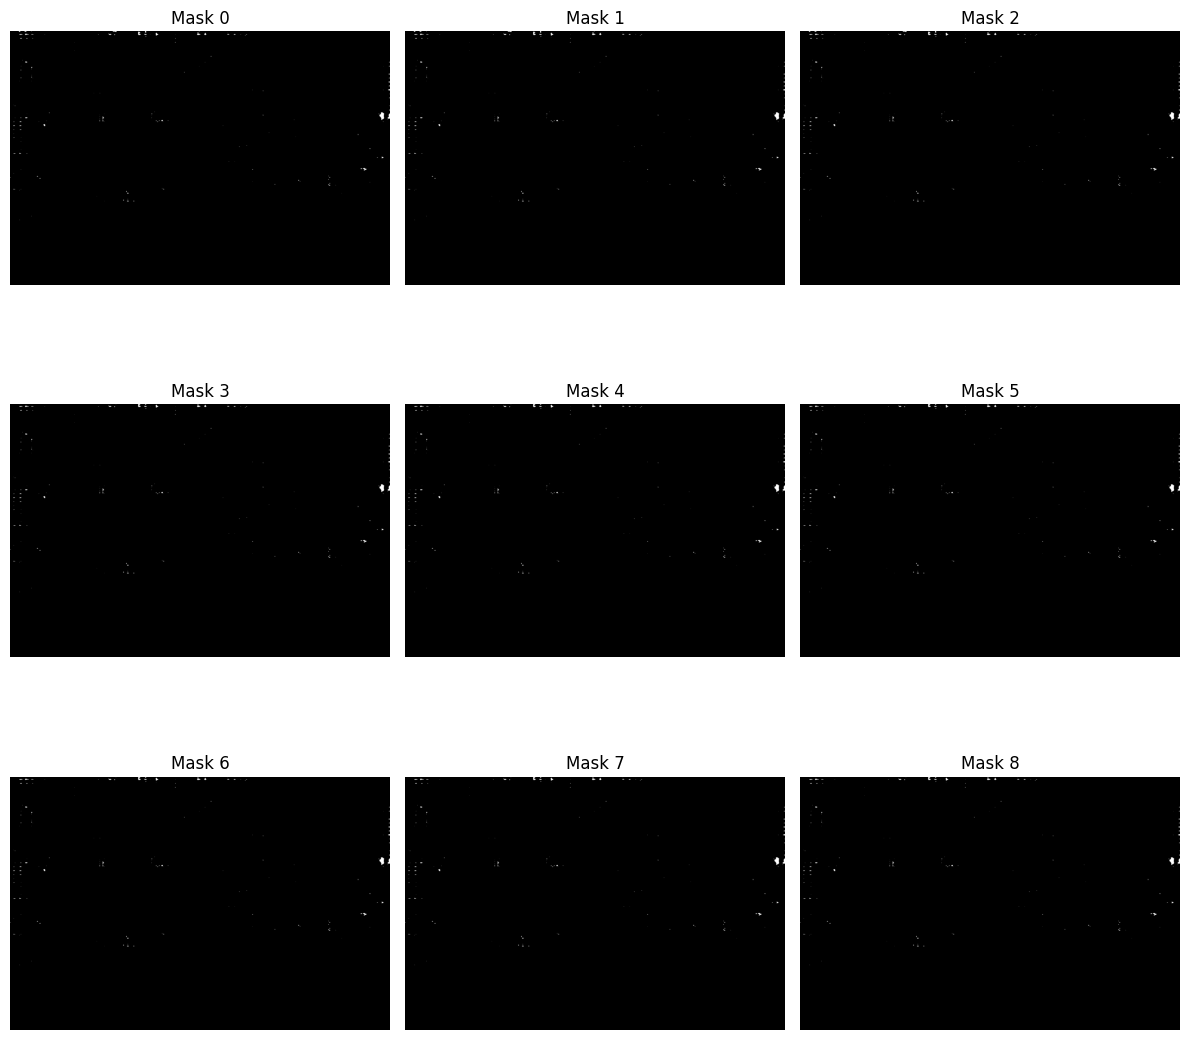

In [5]:
# Build semantic SAM2

sam2_checkpoint = "../checkpoints/sam2.1_hiera_base_plus.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_b+.yaml"

model = build_semantic_sam2(
    config_file="configs/sam2.1/sam2.1_hiera_b+.yaml",  # Use base config
    ckpt_path=sam2_checkpoint,
    device="cuda",
    hydra_overrides_extra=[
        "++model._target_=semantic_sam2.semantic_sam2_components.SAM2Semantic",
        "++model.num_classes=9",
    ],
    use_load_checkpoint_staged_safe=True
)

# Create predictor
predictor = SAM2ImagePredictor(model)

# Set image
image = Image.open(root_dir / 'notebooks/images/truck.jpg')
image = np.array(image.convert("RGB"))
predictor.set_image(image)

input_point=None
input_label=None
# input_point = np.array([[500, 375]])
# input_label = np.array([1])

# Predict with prompts - now outputs 9 masks (one per class)
masks, iou_predictions, low_res_masks = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,  # Set to True to get all class masks
)

# masks shape: [9, H, W] - one mask per class

print(f"Returned masks shape: {masks.shape}")

import matplotlib.pyplot as plt

# assume masks.shape = (9, 1200, 1800)

fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid
axes = axes.flatten()

for i in range(9):
    axes[i].imshow(masks[i], cmap="gray")
    axes[i].set_title(f"Mask {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

### Load trained model

Returned masks shape: (9, 1024, 1024)


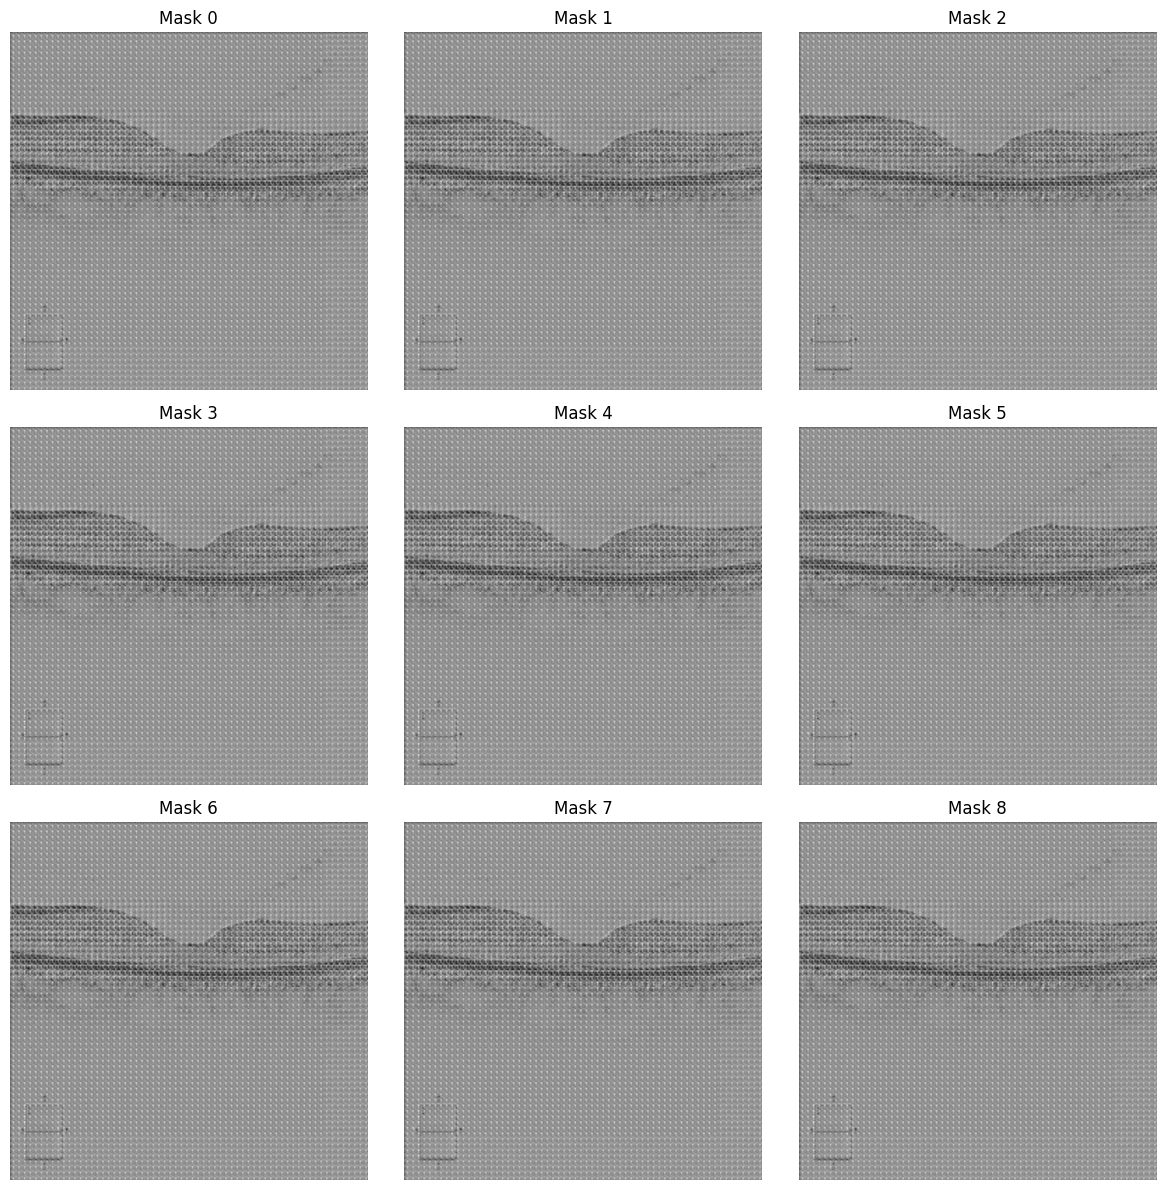

In [ ]:
# Build semantic SAM2

# sam2_checkpoint = "../checkpoints/sam2.1_hiera_base_plus.pt"
sam2_checkpoint = root_dir/"semantic_sam2_runs/best.pt"
model_cfg = root_dir/"configs/sam2.1/sam2.1_hiera_b+.yaml"

model = build_semantic_sam2(
    config_file="configs/sam2.1/sam2.1_hiera_b+.yaml",  # Use base config
    ckpt_path=str(sam2_checkpoint),
    device="cuda",
    hydra_overrides_extra=[
        "++model._target_=semantic_sam2.semantic_sam2_components.SAM2Semantic",
        "++model.num_classes=9",
    ],
    use_load_checkpoint_staged_safe=True
)

# Create predictor
predictor = SAM2ImagePredictor(model)

# Set image
# image = Image.open(root_dir / 'notebooks/images/truck.jpg')
image = Image.open("D:/GitHub/segment_anything_private/processed_data/Healthy/val/img_stretched/NORMAL129.png")
image = np.array(image.convert("RGB"))
predictor.set_image(image)

input_point=None
input_label=None
# input_point = np.array([[500, 375]])
# input_label = np.array([1])

# Predict with prompts - now outputs 9 masks (one per class)
masks, iou_predictions, low_res_masks = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,  # Set to True to get all class masks
    return_logits=True
)

print(f"Returned masks shape: {masks.shape}")

import matplotlib.pyplot as plt

# assume masks.shape = (9, 1200, 1800)
argmax_mask = np.argmax(masks, axis=0)  # shape: (H, W)


fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid
axes = axes.flatten()

for i in range(9):
    axes[i].imshow(masks[i], cmap="gray")
    axes[i].set_title(f"Mask {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [16]:
np.unique(argmax_masks)

array([0])